**Noms et Prénoms :**
> - LONMADON Géofroid 
> - MITCHOZOUNOU Sagbo Jean-Claude.

# TP 2 : Méthode de gradient conjugué
Le but de cette deuxième partie du TP est de programmer, valider et expérimenter l’algorithme du gradient conjugué GC (et sa variante Fletcher-Reeves).


## Etape 1.
> Rappeler l’algorithme GC et l’implémenter. On pourra utilement se servir comme point de départ des codes de gradient développés en Partie 1. Effectuer les tests de validation rapide pour les fonctions quadratiques suivantes ($N = 10, 20, 40$) :
$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}
$$


On rappelle que pour une fonction $J$ quadratique :
$$
J(v)=\frac{1}{2} \langle A v, v \rangle -\langle b, v\rangle; \quad\quad\quad \nabla J(v)=A v-b
$$
où $A$ est une matrice symétrique définie positive, l'algorithme GC s'écrit comme suit:

**Pseudocode**

>  
- Initialisation: $u_0 \in {\mathbb R}^n$ arbitraire, $d_0 = \nabla J(u_0) \in {\mathbb R}^n$
- Itérations: répéter pour $k=0,1,\dots$
  - calculer le gradient $G_k = \nabla J (u_{k})$;
  - calculer $\rho_k$
  $$
  \rho_k = \frac{ \langle G_k, d_{k}\rangle}{\langle A d_{k}, d_{k}\rangle};
  $$
  - poser $u_{k+1} = u_{k} - \rho_k d_k$;
  - calculer le gradient $G_{k+1}=\nabla J (u_{k+1})$;
  - calculer $\beta_k$,
  $$
  \beta_k = -\frac{ \langle G_{k+1}, Ad_{k}\rangle}{\langle A d_{k}, d_{k}\rangle};
  $$
  - poser $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k$;
- Critère d'arrêt:  $\| d_k \|_2 \leq \epsilon$


In [37]:
import numpy as np

In [38]:
def J1 (v): # rappelle des fonctions du TP1. Cette fonction retourne la valeur de la fonction et de sont gradient
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N = len(v)
    r = np.arange (1,N+1)
    return [np.dot(v-r,v-r), 2*(v-r)]

On remarque que dans le cas des fonctions $J_1$ et $J_2$, on a $A = 2 I$ où $I$ est la matrice identité.

In [74]:
## Implémenter ici l'algorithme du GC pour J1 et J2

eps = eps = 1.e-7
Kmax = 1500
u0 = np.zeros(N)

d = 0
G = 0
A = 2*np.eye(N)

def GC_J(J, A, eps, Kmax):
    u0 = np.zeros(N)
    #N = len(u0)
    u = u0
    d = J(u)[1]
    G = J(u)[1]
    
    for k in range(Kmax):
        
        rho = (np.dot(G, d))/np.dot(np.dot(A,d), d)
        
        u += -rho*d
        G = J(u)[1]
        
        beta = -np.dot(G, np.dot(A,d))/np.dot(np.dot(A,d), d)
        
        d = beta*d + J(u)[1]
        if(np.linalg.norm(d) <= eps):
            #print('terminé')
            break
            
    return u, k+1


In [77]:
N = 10
A = 2*np.eye(N)
a=GC_J(J1, A, eps, Kmax)
print("\nFonction J1: Pour N = ", N)
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])

N = 20
A = 2*np.eye(N)
a=GC_J(J1, A, eps, Kmax)

print("\nFonction J1: Pour N = ", N)
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])

N = 40
A = 2*np.eye(N)
a=GC_J(J1, A, eps, Kmax)

print("\nFonction J1: Pour N = ", N)
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])



Fonction J1: Pour N =  10

Le nombre d'itérations est : 1
Le vecteur optimal trouvé est :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Fonction J1: Pour N =  20

Le nombre d'itérations est : 1
Le vecteur optimal trouvé est :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Fonction J1: Pour N =  40

Le nombre d'itérations est : 1
Le vecteur optimal trouvé est :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [76]:
N = 10
A = 2*np.eye(N)
a=GC_J(J2, A, eps, Kmax)

print("Fonction J2: N = ", N)
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])

N = 20
A = 2*np.eye(N)
a=GC_J(J2, A, eps, Kmax)

print("\nFonction J2: Pour N = ", N)
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])

N = 40
A = 2*np.eye(N)
a=GC_J(J2, A, eps, Kmax)

print("\nFonction J2: Pour N = ", N)
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])

Fonction J2: N =  10

Le nombre d'itérations est : 1
Le vecteur optimal trouvé est :
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

Fonction J2: Pour N =  20

Le nombre d'itérations est : 1
Le vecteur optimal trouvé est :
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]

Fonction J2: Pour N =  40

Le nombre d'itérations est : 1
Le vecteur optimal trouvé est :
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40.]


## Etape 2.
On considère les fonctions quadratiques suivantes (en dimension $N$) :

$$
J_3(v)= \frac 12\langle Av,v \rangle− \langle f,v \rangle , \quad\quad\quad J_4(v)= \frac 12 \langle B v,v\rangle − \langle f,v\rangle
$$
avec $f = (1,...,1)$ et les matrices $A$ et $B$ sont des matrices bande données par :

$$
A = {\rm tridiag}[−1, 2, −1],\quad\quad\quad B = {\rm pentadiag}[−1, −1, 4, −1, −1]
$$

$$
A=\left(\begin{array}{ccccc}
2 & -1 & 0 & \cdots & \\
-1 & 2 & -1 & 0 & \cdots \\
0 & -1 & 2 & -1 & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & -1 & 2
\end{array}\right)
\quad\quad\quad \mbox{et même principe pour } B
$$



> - Minimiser les fonctions $J_3$ et $J_4$ par GC ($N = 20,40,80,100,200$), et
- Comparer sur ces fonctions les performances de GC et de GF (avec un pas $t = 0.5$).
- On tracera sur un même graphique les courbes GC et GF de convergence du coût en fonction des itérations.

In [118]:
def J3 (v):
    n = len (v)
    A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    f = np.ones(len(v))
    return 0.5*np.dot(np.dot(A,v),v) - np.dot(f,v), np.dot(A,v) - f

def J4 (v):
    
    #faire la même chose pour J4 (utiliser np.diag)
    #.....
    
    n = len (v)
    coefficients = [-1, -1, 4, -1, -1]
    B = np.diag(coefficients[2] * np.ones(n)) + np.diag(coefficients[1] * np.ones(n-1), k=1) + np.diag(coefficients[0] * np.ones(n-2), k=2) + np.diag(coefficients[3] * np.ones(n-1), k=-1) + np.diag(coefficients[4] * np.ones(n-2), k=-2)

    f = np.ones(len(v))

    return 0.5*np.dot(np.dot(B,v),v) - np.dot(f,v), np.dot(B,v) - f

In [79]:
N = 20
v = np.zeros(N)
J3(v)

(0.0,
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1.]))

In [121]:
## Implémenter ici l'algorithme du GC pour J3 et J4, et aussi l'algorithme GF (du TP1) et comparer les deux algorithmes

def GC_J34(J, A, u0, eps, Kmax):
    u = u0
    d = J(u)[1]
    G = J(u)[1]
    cost = []
    itrs = []
    cost.append(J(u)[0])
    
    for k in range(Kmax):
        
        rho = (np.dot(G, d)) / (np.dot(np.dot(A, d), d))
        u = u - rho * d
        G = J(u)[1]
        beta = -np.dot(G, np.dot(A, d)) / np.dot(np.dot(A, d), d)
        d = G + beta * d
        
        cost.append(J(u)[0])
        itrs.append(k)
        
        if(np.linalg.norm(d) <= eps):
            #print('terminé')
            break
    
    itrs.append(k+1)
    return u, k+1, cost, itrs

t=0.5

def GF(J, A, u0, t, eps, Kmax):
    u = u0
    costGF = []
    itrsGF = []

    for k in range(Kmax):
        G = J(u)[1]
        u = u - t * G

        costGF.append(J(u)[0])
        itrsGF.append(k)
        
        if np.linalg.norm(G) < eps:
            break
    
    return u, k, costGF, itrsGF

In [122]:
N = 10
u0 = np.zeros(N)

n = len (u0)
A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)

gc3 = GC_J34(J3, A, u0, eps, Kmax)
gf = GF(J3, A, u0, t, eps, Kmax)

print("Fonction J3: N = ", N)
print("\nGradient conjugué:\nLe nombre d'itérations est : " +str(gc3[1])+ "\nLe vecteur optimal trouvé est :\n", gc3[0])
print("\nGradient fixe:\nLe nombre d'itérations est : " +str(gf[1])+ "\nLe vecteur optimal trouvé est :\n", gf[0])



Fonction J3: N =  10

Gradient conjugué:
Le nombre d'itérations est : 5
Le vecteur optimal trouvé est :
 [ 5.  9. 12. 14. 15. 15. 14. 12.  9.  5.]

Gradient fixe:
Le nombre d'itérations est : 417
Le vecteur optimal trouvé est :
 [ 4.99999986  8.99999974 11.99999963 13.99999956 14.99999952 14.99999952
 13.99999956 11.99999963  8.99999974  4.99999986]


In [137]:
N = 10
u0 = np.zeros(N)
t = 0.1
n = len (u0)
B = np.diag(coefficients[2] * np.ones(n)) + np.diag(coefficients[1] * np.ones(n-1), k=1) + np.diag(coefficients[0] * np.ones(n-2), k=2) + np.diag(coefficients[3] * np.ones(n-1), k=-1) + np.diag(coefficients[4] * np.ones(n-2), k=-2)

gc3 = GC_J34(J4, B, u0, eps, Kmax)
gf = GF(J4, A, u0, t, eps, Kmax)

print("Fonction J4: N = ", N)
print("\nGradient conjugué:\nLe nombre d'itérations est : " +str(gc3[1])+ "\nLe vecteur optimal trouvé est :\n", gc3[0])
print("\nGradient fixe:\nLe nombre d'itérations est : " +str(gf[1])+ "\nLe vecteur optimal trouvé est :\n", gf[0])


Fonction J4: N =  10

Gradient conjugué:
Le nombre d'itérations est : 4
Le vecteur optimal trouvé est :
 [1.45833333 2.08333333 2.75       3.125      3.33333333 3.33333333
 3.125      2.75       2.08333333 1.45833333]

Gradient fixe:
Le nombre d'itérations est : 468
Le vecteur optimal trouvé est :
 [1.45833329 2.08333327 2.74999991 3.1249999  3.33333322 3.33333322
 3.1249999  2.74999991 2.08333327 1.45833329]


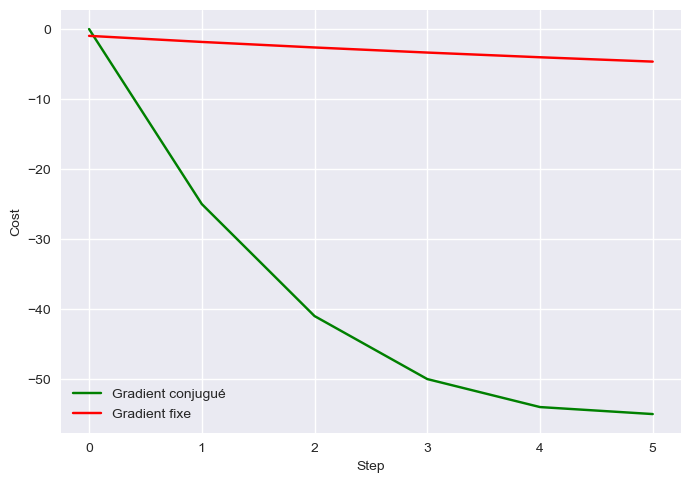

In [141]:
import matplotlib.pyplot as plt

plt.plot(gc[3], gc[2], color="g", label = 'Gradient conjugué') 

x = gf[3][:6]
y = gf[2][:6]
plt.plot(x, y, color="red", label = 'Gradient fixe')

plt.xlabel("Step")
plt.ylabel("Cost")
plt.legend()
plt.show()

## Etape 3.

> - Effectuer une étude du comportement de NLGC (Fletcher-Reeves à pas constant bien choisi) vis à vis du paramètre $\epsilon$ pour la fonction quadratique suivante $(N = 10, 20, 40)$ :
$$
J_{\epsilon}(v)=\sum_{i=1}^{i=N}\left(v_{i}\right)^{2}+\frac{1}{\epsilon} \sum_{i=1}^{N-1}\left\{\left(v_{i}+v_{i+1}-N / 2\right)\right\}^{2}
$$
On fera l’étude pour $\epsilon > 0$ de plus en plus petit, par exemple $\epsilon = 10^{-p}, p = 0, 1, 2, 3$. Comparer la solution optimale calculée $u^∗$ ainsi que son coût $J_\epsilon(u^∗)$ et son gradient à ceux du vecteur $c$ défini par $c_i = N/4$ $(i = 1,\dots, N)$. Interpréter les résultats obtenus.


On rappelle que dans le cas d'une fonction quadratique
$J(v)=\frac{1}{2} \langle A v, v \rangle -\langle b, v\rangle+c$, l'algorithme NLGC (Fletcher-Reeves à pas constant) s'écrit comme suit:

**Pseudocode**

>  
- Initialisation: $u_0 \in {\mathbb R}^n$ arbitraire, $d_0 = \nabla J(u_0) \in {\mathbb R}^n$ et un pas fixe $\rho>0$
- Itérations: répéter pour $k=0,1,\dots$
  - calculer le gradient $G_k = \nabla J (u_{k})$;
  - poser $u_{k+1} = u_{k} - \rho d_k$;
  - calculer le gradient $G_{k+1}=\nabla J (u_{k+1})$;
  - calculer $\beta_k$,
  $$
  \beta_k = \frac{ \langle G_{k+1}, G_{k+1}\rangle}{\langle G_{k}, G_{k}\rangle}; \quad\text{ (Fletcher-Reeves) }
  $$
  - poser $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k$;
- Critère d'arrêt:  $\| d_k \|_2 \leq \epsilon'$


In [253]:
def Jeps(epsilon, v):
    ## calculer la valeur et le gradient de la fonction J(epsilon, v)
    
    N = len(v)
    a = v[:-1] + v[1:] - (N/2)
    b = np.dot(v, v) + ((1 / epsilon) * (np.dot(a, a)))
    
    g1 = 2*(v[0] + v[1] - (N/2))
    g2 = (2*v[0:N-2]) + (4*v[1:N-1]) + (2*v[2:N]) - (2*N)
    g3 = 2*(v[N-2] + v[N-1] - (N/2))
    
    g4 = np.hstack((g1, g2))
    g5 = np.hstack((g4, g3))
    g = (2 * v) + ((1 / epsilon) * (g5))

    return b, g


In [254]:
N = 10
u0 = np.ones(N)
Jeps(1, u0)

(91.0, array([ -4., -10., -10., -10., -10., -10., -10., -10., -10.,  -4.]))

In [255]:
## Implémenter ici l'algorithme du NLGC pour Jeps

def g_nlgc(Jeps, u0, epsilon, rho, eps, Kmax):
    u = u0
    
    costj = []
    itrsj = []
    d = Jeps(epsilon, u)[1]
    costj.append(Jeps(epsilon, u)[0])
    
    for k in range(Kmax):
        
        
        G1 = Jeps(epsilon, u)[1]
        u = u - rho*d
        G2 = Jeps(epsilon, u)[1]
        #print(G2)
        
        beta = np.dot(G2, G2) / np.dot(G1, G1)
        
        d1 = G2 + beta*d
        
        d = d1
        
        costj.append(Jeps(epsilon, u)[0])
        itrsj.append(k)
        
        if np.linalg.norm(d) <= eps:
            break
        
        itrsj.append(k+1)
        
    return u, k+1


In [257]:
epsilon = 1.e-3
rho = 1.e-4
N = 10
u0 = np.zeros(N)

q = g_nlgc(Jeps, u0, epsilon, rho, eps, Kmax)
print(q)

(array([2.4938026 , 2.5037036 , 2.4962865 , 2.50122712, 2.49875804,
       2.49875804, 2.50122712, 2.4962865 , 2.5037036 , 2.4938026 ]), 166)
